In [ ]:
import cv2
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

# Define the configuration file
config_file = "/home/ayagoz/Documents/projects/MedLafaletCV/block_detection/e2e_faster_rcnn_X-101-64x4d-FPN_1x.yaml"  # Replace with the path to your config file
model_checkpoint = "/home/ayagoz/Documents/projects/MedLafaletCV/block_detection/model_final.pkl"  # Replace with the path to your model checkpoint

# Load configuration
cfg = get_cfg()
cfg.set_new_allowed(True)
cfg.merge_from_file(config_file)
cfg.MODEL.WEIGHTS = model_checkpoint
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for detections

# Build model
# model = build_model(cfg)
# DetectionCheckpointer(model).load(model_checkpoint)

# Create a predictor
predictor = DefaultPredictor(cfg)

# Load an image
image = "/home/ayagoz/Documents/projects/MedLafaletCV/block_detection/output1.png"  # Replace with the path to your image
im = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)

# Perform inference
outputs = predictor(im)

# Access predictions
instances = outputs["instances"]
print(instances.pred_classes)  # Predicted classes
print(instances.scores)  # Confidence scores
print(instances.pred_boxes)  # Bounding box coordinates


In [ ]:
image = "/home/ayagoz/Documents/projects/MedLafaletCV/block_detection/output1.png"  # Replace with the path to your image
im = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)

# Perform inference
outputs = predictor(im)

# Access predictions
instances = outputs["instances"]
print(instances.pred_classes)  # Predicted classes
print(instances.scores)  # Confidence scores
print(instances.pred_boxes)  # Bounding box coordinates


In [1]:
from PIL import Image, ImageEnhance

def simulate_scanned_document(input_image_path, output_image_path, brightness=1.4, contrast=1.7):
    # Open the input image
    image = Image.open(input_image_path)
    
    # Adjust brightness and contrast
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(brightness)
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast)
    
    # Save the modified image
    image.save(output_image_path)

# Example usage
input_image_path = "/home/ayagoz/Documents/projects/MedLafaletCV/block_detection/test_imgs/noshpa_crop.png"  # Replace with your input image path
output_image_path = "scanned_document.jpg"  # Replace with your output image path
simulate_scanned_document(input_image_path, output_image_path)

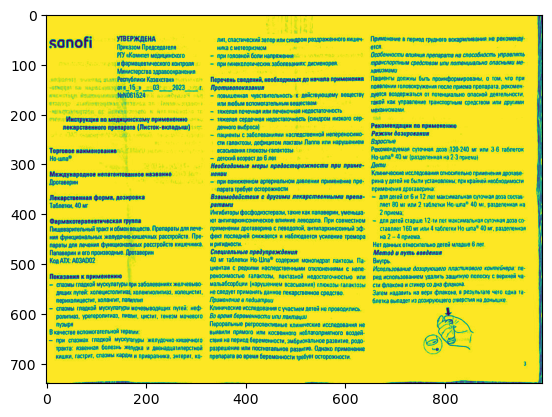

In [2]:
import cv2
img = cv2.imread('/home/ayagoz/Documents/projects/MedLafaletCV/ouput_imgs/scanned_document.jpg')
import matplotlib.pyplot as plt

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size. 
# Kernel size increases or decreases the area 
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect 
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)

[(5, 653, 10, 5), (6, 50, 33, 21), (6, 267, 53, 16), (6, 330, 60, 16), (6, 362, 88, 16), (6, 542, 10, 4), (6, 589, 9, 5), (6, 631, 9, 14), (7, 283, 47, 14), (7, 315, 95, 16), (7, 378, 49, 14), (7, 409, 147, 16), (7, 425, 120, 16), (7, 444, 19, 10), (7, 459, 57, 13), (7, 471, 211, 32), (7, 520, 62, 14), (16, 634, 45, 11), (19, 683, 36, 11), (20, 535, 80, 15), (20, 555, 33, 12), (20, 570, 82, 13), (20, 586, 39, 12), (20, 602, 49, 13), (20, 618, 36, 13), (20, 650, 19, 13), (20, 666, 36, 13), (28, 441, 87, 16), (33, 223, 90, 13), (40, 44, 54, 26), (40, 204, 67, 17), (44, 650, 43, 11), (54, 551, 32, 16), (57, 377, 15, 14), (58, 681, 40, 13), (58, 735, 207, 5), (60, 270, 84, 11), (60, 665, 47, 11), (62, 583, 41, 15), (62, 630, 86, 14), (63, 475, 8, 10), (66, 459, 42, 11), (70, 523, 9, 10), (72, 601, 77, 14), (73, 380, 13, 10), (80, 522, 74, 13), (88, 553, 85, 12), (92, 646, 40, 14), (95, 362, 44, 15), (100, 680, 39, 11), (101, 535, 153, 16), (103, 317, 95, 11), (103, 569, 48, 11), (106, 585,

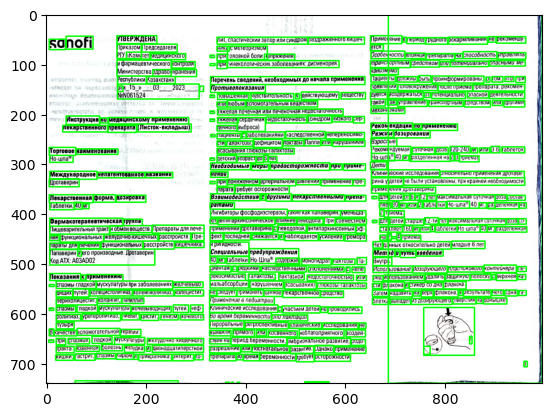

In [8]:
import pytesseract
im = img.copy()
result = ''

sorted_rects = sorted((cv2.boundingRect(cnt) for cnt in contours), key=lambda rect: (rect[0], rect[1]))
print(sorted_rects)
for cnt in sorted_rects:
    x, y, w, h = cnt
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # cropped = im[y:y + h, x:x + w]
    # print(pytesseract.image_to_string(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB), lang='rus'))
plt.imshow(img)

[(58, 298), (41, 574), (25, 4)]


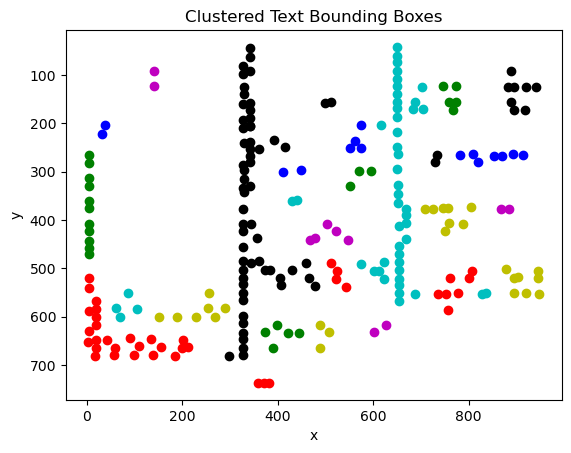

In [90]:
import numpy as np
from sklearn.cluster import DBSCAN
from collections import defaultdict
import matplotlib.pyplot as plt

# Example bounding boxes [x, y, w, h]
bboxes = sorted_rects

# Step 1: Prepare features (x, y coordinates)
X = np.array([[bbox[0], bbox[1]] for bbox in bboxes])

# Step 2: Apply DBSCAN clustering
dbscan = DBSCAN(eps=40, min_samples=2).fit(X)
labels = dbscan.labels_

# Step 3: Group bounding boxes by cluster
clusters = defaultdict(list)
for bbox, label in zip(bboxes, labels):
    if label != -1:  # -1 is noise in DBSCAN
        clusters[label].append(bbox)

# Step 4: Sort within clusters by y coordinate
for cluster_id in clusters:
    clusters[cluster_id] = sorted(clusters[cluster_id], key=lambda bbox: bbox[1])

cluster_stats = {cluster_id: (len(bboxes), min(bbox[0] for bbox in bboxes)) for cluster_id, bboxes in clusters.items()}
sorted_cl = sorted(cluster_stats.items(), key=lambda item: item[1][0], reverse=True)
final_clusters_x = [sorted_cl[0][1]]
for s in sorted_cl[1:]:
    if s[1][0] > final_clusters_x[-1][0]/2:
        final_clusters_x.append(s[1])
print(final_clusters_x)
# Optional: Visualize the clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster_id, bboxes in clusters.items():
    color = colors[cluster_id % len(colors)]
    for bbox in bboxes:
        plt.scatter(bbox[0], bbox[1], color=color)
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustered Text Bounding Boxes')
plt.show()


In [1]:
from text_handler import TextHandler
import cv2
hnd = TextHandler(debug=True)
print(hnd(cv2.imread('/home/ayagoz/Documents/projects/MedLafaletCV/ouput_imgs/test_imgs/photo_2024-05-16_14-31-40.jpg')))

[(89, 652), (69, 327), (42, 3)]
745
[0, 44, 89, 134, 179, 223, 268, 313, 358] 359
[0, 131, 242, 336, 427, 493, 558, 650, 742]
(745, 991, 3) 991 745 [3, 327, 652, 990]
3 0 327 131
3 129 327 242
3 240 327 336
3 334 327 427
3 425 327 493
3 491 327 558
3 556 327 650
3 648 327 742
322 0 652 131
322 129 652 242
322 240 652 336
322 334 652 427
322 425 652 493
322 491 652 558
322 556 652 650
322 648 652 742
647 0 990 131
647 129 990 242
647 240 990 336
647 334 990 427
647 425 990 493
647 491 990 558
647 556 990 650
647 648 990 742
запой

УТВЕРЖДЕНА.

Приказом Председателя

АУ «Комитет модицинского

и фармацовтического контроля
Министерства здрапоокрамения:
‘Реслуопики Казахстан.
1563 2023
№06т52а

`Инструкция по медицинскому применению
`пекарственного препарата (Листок-вкладыш)
Торговое и
Нозшла”

 

оменованиь

Международное непатентованное на:

 
Дротаверин:

Лекарственная форма, дозировка
Таблетки, 40 мг

 Фармакотерапевтическая группа.
Пищеварительный тракт и обмен веществ Препараты дл

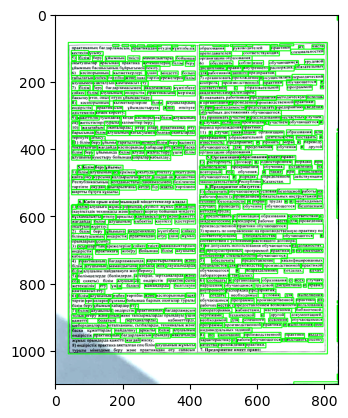

In [84]:
plt.imshow(img)

In [ ]:
ocr = PaddleOCR()
result = ocr.ocr('your_image.jpg')

In [3]:
result

'Показания к применению\n\n— спазмы (ладкой мускулатуры при заболеваниях желчевыво\nдящих путей: холецистолитиах холенгиолитиаз, холецисия,\nперихолицестит, холаниит папиллит\n\n— спазмы гладкой мускулатуры мочевыводящих путей: неф.\nролитивз, уротеролитиез, пиеит, цистит, тенези мочевого\nпрыря\n\nВ качестве вспомогательной тервнии:\n\n— при спазмах гладкой мускупуры желудочно кишечного\nтракта: язвенная болезнь желудка и двенадуатилерстной\nкишки, гастрит, спазмы кардм и привратника, энтерит, ко.\n\x0cзопой\n\x0c \n\nНо-шпа”.\n\x0cМеждународное непатентованное название\n Дротаверин.\n\x0c \n\n„Лекарственная форма, дозиров,\nТаблетки, 40 мг\n\x0c‘Фармакотерапевтическая группа\nПищеварительный тракт и обмен веществе Препараты для лече\'\nния функциональных желудочнокишечных рассгройсте. Пре.\nпараты для лечения функциональных расстройств кишечника\nПапаверин и его производные. Дротаверин\n\nКод АТХ. А03А002.\n\x0cИнструкция по медицинскому применению.\nлекарственного препарата (Листок-

In [4]:
p = result.strip().replace('\n', ' ').replace('\x0c', ' ')

In [52]:
from groq import Groq
import os
client = Groq(api_key='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')

completion = client.chat.completions.create(
    model="llama3-70b-8192",
    messages=[{
        'role' : 'user',
        'content' : '"hell how r u?" fix this text'
    }],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)
print(completion)
print(completion.choices[0].message.content)

ChatCompletion(choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChoiceMessage(content='A classic example of "text speak"!\n\nHere\'s the corrected text:\n\n"Hello, how are you?"', role='assistant', tool_calls=None))], id='chatcmpl-8dc5c9a9-1bbe-443e-a034-7d35f7b598c3', created=1715863960, model='llama3-70b-8192', object='chat.completion', system_fingerprint='fp_9625f32860', usage=Usage(completion_time=0.073, completion_tokens=22, prompt_time=0.01, prompt_tokens=19, queue_time=None, total_time=0.08299999999999999, total_tokens=41), x_groq={'id': 'req_01hy0qcf89eq1tsj9fxceyve0k'})
A classic example of "text speak"!

Here's the corrected text:

"Hello, how are you?"
